In [1]:
import re, string
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
# sentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report

# DataFrame Analysis

DataSet Link: [Kaggle](https://www.kaggle.com/ruchi798/data-science-tweets)

In [2]:
# read file
df = pd.read_csv('tweets/data_science.csv', engine='python')
df = df.head(20000)

# extract id, created_at, username, tweet
df = df[["id", "created_at", "username", "tweet"]]
df.columns = ["id", "date", "user", "tweet"]

# and convert date
df.date = pd.to_datetime(df.date, format="%Y-%m-%d %H:%M:%S IST").dt.tz_localize('EST').dt.tz_convert('Asia/Kolkata')

In [3]:
# show structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   id      20000 non-null  int64                       
 1   date    20000 non-null  datetime64[ns, Asia/Kolkata]
 2   user    20000 non-null  object                      
 3   tweet   20000 non-null  object                      
dtypes: datetime64[ns, Asia/Kolkata](1), int64(1), object(2)
memory usage: 625.1+ KB


In [4]:
df.sample(5)

,id,date,user,tweet
7634,1380958788946161672,2021-04-11 11:00:06+05:30,salesforce,"""SDGs are still achievable...businesses and go..."
16127,1355754010129608708,2021-01-31 21:45:19+05:30,kirkdborne,Excellent review of Unsupervised Learning — di...
10069,1374142193154322432,2021-03-23 15:33:23+05:30,libertariancdn,I keep hearing the word science being thrown a...
700,1404860087571779592,2021-06-16 09:55:20+05:30,sciencecareers,Assistant Professor in Data-driven cell and mo...
8825,1377259240209981450,2021-04-01 05:59:25+05:30,turinginst,"#AIUK: Our inspiring panel of #STEM, #diversit..."


# Analyze Text

In [5]:
# preview
df.tweet = df.tweet.str.lower()

df.tweet

0        what can be done?  - never blindly trust an ab...
1        "we need a paradigm shift from model-centric t...
2        using high-resolution satellite data and compu...
3        .@stephenson_data shares four steps that will ...
4        "curricula is inherently brittle in a world wh...
                               ...                        
19995    inside airbnb and doordash's ipos — citigroup'...
19996    sabries definir el #bigdata? 🤔  la dra. @egolo...
19997    why @fulhack, the cto of @betterdotcom, doesn’...
19998    although even the best #machinelearning models...
19999    top 10 programmers to follow on youtube @analy...
Name: tweet, Length: 20000, dtype: object

#### Cleaning and removing the stop words from the tweet text

In [6]:
stop_words = stopwords.words('english')

def cleaning_stopwords(text: str) -> str:
    return " ".join(word for word in text.split() if word not in stop_words)

df.tweet = df.tweet.apply(cleaning_stopwords)

df.tweet.head(5)

0    done? - never blindly trust abstract, press re...
1    "we need paradigm shift model-centric data-cen...
2    using high-resolution satellite data computer ...
3    .@stephenson_data shares four steps help new d...
4    "curricula inherently brittle world in-demand ...
Name: tweet, dtype: object

#### Cleaning and removing punctuations

In [7]:
punctuations_list = string.punctuation

def cleaning_punctuations(text: str) -> str:
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

df.tweet = df.tweet.apply(cleaning_punctuations)

df.tweet.head(5)

0    done  never blindly trust abstract press relea...
1    we need paradigm shift modelcentric datacentri...
2    using highresolution satellite data computer a...
3    stephensondata shares four steps help new data...
4    curricula inherently brittle world indemand sk...
Name: tweet, dtype: object

#### Cleaning and removing URL’s

In [8]:
pattern, replacement = '((www.[^s]+)|(https?://[^s]+))', ' '

def cleaning_URLs(text: str) -> str:
    return re.sub(pattern, replacement, text)

df.tweet = df.tweet.apply(cleaning_URLs)

df.tweet.head(5)

0    done  never blindly trust abstract press relea...
1    we need paradigm shift modelcentric datacentri...
2    using highresolution satellite data computer a...
3    stephensondata shares four steps help new data...
4    curricula inherently brittle world indemand sk...
Name: tweet, dtype: object

#### Cleaning and removing Numeric numbers

In [9]:
pattern, replacement = '[0-9]+', ''

def cleaning_numbers(text: str) -> str:
    return re.sub(pattern, replacement, text)

df.tweet = df.tweet.apply(cleaning_numbers)

df.tweet.head(5)

0    done  never blindly trust abstract press relea...
1    we need paradigm shift modelcentric datacentri...
2    using highresolution satellite data computer a...
3    stephensondata shares four steps help new data...
4    curricula inherently brittle world indemand sk...
Name: tweet, dtype: object

#### Getting tokenization of tweet text

In [10]:
df.tweet = df.tweet.apply(word_tokenize)

df.tweet.head(5)

0    [done, never, blindly, trust, abstract, press,...
1    [we, need, paradigm, shift, modelcentric, data...
2    [using, highresolution, satellite, data, compu...
3    [stephensondata, shares, four, steps, help, ne...
4    [curricula, inherently, brittle, world, indema...
Name: tweet, dtype: object

#### Applying Lemmatizer

In [11]:
lemmatizer = WordNetLemmatizer()

def lemmatizer_on_text(text: str) -> str:
    return " ".join(lemmatizer.lemmatize(word) for word in text)

df.tweet = df.tweet.apply(lemmatizer_on_text)

df.tweet.head(5)

0    done never blindly trust abstract press releas...
1    we need paradigm shift modelcentric datacentri...
2    using highresolution satellite data computer a...
3    stephensondata share four step help new data s...
4    curriculum inherently brittle world indemand s...
Name: tweet, dtype: object

# Text Sentiment Analysis

In [12]:
analyser = SentimentIntensityAnalyzer()

def calculate_sentiment(text: str) -> float:
    polarity, subjectivity = TextBlob(text).sentiment
    return (round(polarity, 5), round(subjectivity, 5))

def calculate_sentiment_analyser(text: str) -> float:    
    return analyser.polarity_scores(text)

#### Calculating sentiments

In [13]:
df["sentiment"] = df.tweet.apply(calculate_sentiment)
df["sentiment_analyser"] = df.tweet.apply(calculate_sentiment_analyser)

df.head(5)

,id,date,user,tweet,sentiment,sentiment_analyser
0,1406400408545804288,2021-06-20 15:56:01+05:30,ballouxfrancois,done never blindly trust abstract press releas...,"(-0.05278, 0.57778)","{'neg': 0.231, 'neu': 0.629, 'pos': 0.141, 'co..."
1,1406390341176016897,2021-06-20 15:16:01+05:30,tdatascience,we need paradigm shift modelcentric datacentri...,"(0.0, 0.4)","{'neg': 0.135, 'neu': 0.692, 'pos': 0.173, 'co..."
2,1406386311481774083,2021-06-20 15:00:00+05:30,sciencenews,using highresolution satellite data computer a...,"(-0.33333, 0.5)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1406383545153638402,2021-06-20 14:49:01+05:30,tdatascience,stephensondata share four step help new data s...,"(0.23485, 0.47727)","{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp..."
4,1406358632648818689,2021-06-20 13:10:01+05:30,tdatascience,curriculum inherently brittle world indemand s...,"(0.1, 0.35)","{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'comp..."


In [14]:
df['compound_score'] = ''
df['compound_score_sentiment'] = ''

for i in range(len(df.index)): 
    df.loc[i, 'compound_score'] = df.loc[i, 'sentiment_analyser']['compound']
    sc = df.compound_score[i]

    df.loc[i, 'compound_score_sentiment'] = \
        'Negative'if (sc <= -0.05) else \
        'Positive' if (sc >= 0.05) else \
        'Neutral'
    
df.head(5)

,id,date,user,tweet,sentiment,sentiment_analyser,compound_score,compound_score_sentiment
0,1406400408545804288,2021-06-20 15:56:01+05:30,ballouxfrancois,done never blindly trust abstract press releas...,"(-0.05278, 0.57778)","{'neg': 0.231, 'neu': 0.629, 'pos': 0.141, 'co...",-0.4592,Negative
1,1406390341176016897,2021-06-20 15:16:01+05:30,tdatascience,we need paradigm shift modelcentric datacentri...,"(0.0, 0.4)","{'neg': 0.135, 'neu': 0.692, 'pos': 0.173, 'co...",0.0,Neutral
2,1406386311481774083,2021-06-20 15:00:00+05:30,sciencenews,using highresolution satellite data computer a...,"(-0.33333, 0.5)","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
3,1406383545153638402,2021-06-20 14:49:01+05:30,tdatascience,stephensondata share four step help new data s...,"(0.23485, 0.47727)","{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'comp...",0.743,Positive
4,1406358632648818689,2021-06-20 13:10:01+05:30,tdatascience,curriculum inherently brittle world indemand s...,"(0.1, 0.35)","{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'comp...",0.4019,Positive


In [15]:
df.compound_score_sentiment.value_counts()

Positive    11993
Neutral      5946
Negative     2061
Name: compound_score_sentiment, dtype: int64

#### Implementing KMeans

In [16]:
# Considering 3 grams and mimnimum frq as 0
# tf_idf_vect = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 3), min_df = 0, stop_words = 'english')
tf_idf_vect = CountVectorizer(analyzer='word',ngram_range=(1,1),stop_words='english', min_df = 0.0001)
tf_idf_vect.fit(df.tweet)
desc_matrix = tf_idf_vect.transform(df.tweet)

In [17]:
# implement kmeans
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

In [18]:
# create DataFrame films from all of the input files.
tweets = {'Tweet': df.tweet.tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])

frame.Cluster.value_counts()

0    10673
1     6322
2     3005
Name: Cluster, dtype: int64

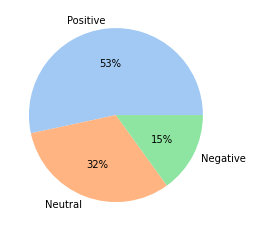

In [19]:
#create pie chart

colors = sns.color_palette('pastel')[0:3]
_ = plt.pie(frame.Cluster.value_counts(), labels = ["Positive", "Neutral", "Negative"], colors = colors, autopct='%.0f%%')